# Data Collection:
- Lu’s communication has already provided the data (data.csv). However, this data is
not perfect.
- It may contain outliers, missing values and irrelevant (not related to
churn) information

# Reading The Data

In [54]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# reading data in dataframe:
df = pd.read_csv('Group 1.csv')

In [114]:
df.shape

(7350, 12)

In [56]:
# watching sample data
df.head()

,Unnamed: 0,customer_id,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,Class
0,0,G1606,Female,Lancashire,0,1,0,20.0,NaN,2,0,Churn=No
1,1,F8889,Female,Essex,0,1,0,4.0,NaN,1,5,Churn=No
2,2,C5068,Female,Essex,0,Unknown,1,9.0,NaN,2,0,Churn=No
3,3,G9820,Male,West Yorkshire,1,1,1,9.0,NaN,4,9,Churn=No
4,4,H7261,Male,Greater Manchester,0,1,0,6.0,NaN,2,5,Churn=No


In [57]:
#watching data description:
df.describe()

,Unnamed: 0,partner,senior,Tenure,package
count,7350.000000,7350.000000,7350.000000,7350.000000,7350.000000
mean,3674.500000,0.547619,0.167755,8.679195,2.377143
std,2121.906572,0.497761,0.373674,6.327471,1.164551
min,0.000000,0.000000,0.000000,-5.196152,1.000000
25%,1837.250000,0.000000,0.000000,3.000000,1.000000
50%,3674.500000,1.000000,0.000000,9.000000,2.000000
75%,5511.750000,1.000000,0.000000,13.000000,4.000000
max,7349.000000,1.000000,1.000000,30.000000,4.000000


In [58]:
# watching the number of rows and columns of data
print("Number of rows:", len(df))
print("Number of columns:", len(df.columns))

Number of rows: 7350
Number of columns: 12


# Data Preparation

- We prepare the data column wise, as every column would require different preprocessing

In [59]:
def display_basic_information(df, column_name):
    data_type = df[column_name].dtype
    null_values = df[column_name].isna().sum()
    print("###################")
    print("Basic Information:")
    print("###################\n")
    print("column name:", column_name)
    print("data type:", data_type)
    print("total number of null values:", null_values)

## Column: customer_id

- description: Every customer is given a unique ID
- breif: its a identity column, we do not need to process it. Hence, just some basic information on the column and we'd move on.

In [60]:
column_name = 'customer_id'
display_basic_information(df, column_name)

###################
Basic Information:
###################

column name: customer_id
data type: object
total number of null values: 0


In [61]:
#lets convert the column datatype to string
df[column_name] = df[column_name].astype('string')
display_basic_information(df, column_name)

###################
Basic Information:
###################

column name: customer_id
data type: string
total number of null values: 0


## Column: gender
 - description: Whether the customer is a male or a female
 - breif: we would perform preprocessing, and analyse null values

In [62]:
column_name = 'gender'
display_basic_information(df, column_name)

###################
Basic Information:
###################

column name: gender
data type: object
total number of null values: 0


In [63]:
# Ok, so there are no null values but the data type is misiterpreted 

df[column_name] = df[column_name].astype('string')
display_basic_information(df, column_name)

###################
Basic Information:
###################

column name: gender
data type: string
total number of null values: 0


In [64]:
 # we can also visualise the count per category
 df[column_name].value_counts()

Female    3689
Male      3661
Name: gender, dtype: Int64

## Column: location
 - description: Location of the customer
 - breif: we would perform preprocessing, and analyse null values


In [65]:
column_name = 'location'
display_basic_information(df, column_name)

###################
Basic Information:
###################

column name: location
data type: object
total number of null values: 0


In [66]:
# Ok, so there are no null values but the data type is misiterpreted 

df[column_name] = df[column_name].astype('string')
display_basic_information(df, column_name)

###################
Basic Information:
###################

column name: location
data type: string
total number of null values: 0


In [67]:
 # we can also visualise the count per category
df[column_name].value_counts()

Greater London        2347
West Midlands          633
Greater Manchester     594
West Yorkshire         504
Kent                   421
Essex                  406
Hampshire              391
Lancashire             362
South Yorkshire        319
Merseyside             319
Hertfordshire          276
Devon                  259
North Yorkshire        257
Surrey                 234
Tyne and Wear           13
Staffordshire            9
Nottinghamshire          6
Name: location, dtype: Int64

## Column: partner
 - description: Whether the customer has a partner or not (1=Yes, 0=No)
 - breif: we would perform preprocessing, and analyse null values

In [68]:
column_name = "partner"
display_basic_information(df, column_name)

###################
Basic Information:
###################

column name: partner
data type: int64
total number of null values: 0


In [69]:
# Ok, so there are no null values but the data type is misiterpreted 

df[column_name] = df[column_name].astype('int')
display_basic_information(df, column_name)

###################
Basic Information:
###################

column name: partner
data type: int32
total number of null values: 0


In [70]:
 # we can also visualise the count per category
 df[column_name].value_counts()

1    4025
0    3325
Name: partner, dtype: int64

## Column: dependents
 - description: Whether the customer has dependents or not (1=Yes, 0=No)
 - breif: we would perform preprocessing, and analyse null values

In [71]:
column_name  = 'dependents'
display_basic_information(df, column_name)

###################
Basic Information:
###################

column name: dependents
data type: object
total number of null values: 0


In [72]:
# Ok, so there are no null values but the data type is misiterpreted 

df[column_name] = df[column_name].astype('string')
display_basic_information(df, column_name)

###################
Basic Information:
###################

column name: dependents
data type: string
total number of null values: 0


In [73]:
 # we can also visualise the count per category
 df[column_name].value_counts()

1          3531
Unknown    2208
0          1611
Name: dependents, dtype: Int64

In [74]:
# as we can see, there is a value  like 'Unknown', we can replace that with null
df[column_name] = df[column_name].replace(to_replace = {"Unknown": np.nan})
# now we need to change the column type to float 
df[column_name] = df[column_name].astype('float')

# lets visualize the basic info now
display_basic_information(df, column_name)

###################
Basic Information:
###################

column name: dependents
data type: float64
total number of null values: 2208


## Column: senior
 - description: Whether the customer has a partner or not (1=Yes, 0=No)
 - breif: we would perform preprocessing, and analyse null values

In [75]:
column_name = 'senior'
display_basic_information(df, column_name)

###################
Basic Information:
###################

column name: senior
data type: int64
total number of null values: 0


In [76]:
 # we can also visualise the count per category
 df[column_name].value_counts()

0    6117
1    1233
Name: senior, dtype: int64

## Column: Tenure
 - description: Number of years the customer has stayed with the company. Lu’s
communication offers a loyalty scheme; this scheme gives 2% discount on the
monthly cost for each year (up to 25 years) the customer remains with the company
 - breif: we would perform preprocessing, and analyse null values

In [77]:
column_name = 'Tenure'
display_basic_information(df, column_name)

###################
Basic Information:
###################

column name: Tenure
data type: float64
total number of null values: 0


In [78]:
 # we can also visualise the count per category
 df[column_name].value_counts()

 1.000000     683
 0.000000     664
 8.000000     459
 9.000000     445
 10.000000    407
 7.000000     402
 12.000000    378
 13.000000    366
 11.000000    356
 2.000000     351
 14.000000    317
 6.000000     307
 15.000000    306
 16.000000    277
 5.000000     266
 17.000000    231
 4.000000     185
 18.000000    177
 3.000000     168
 19.000000    145
 20.000000    108
 21.000000     80
 22.000000     59
 23.000000     39
 24.000000     17
-1.000000      16
 25.000000     12
-2.828427      10
-3.872983       9
 26.000000      9
-3.000000       9
-1.414214       8
-3.316625       8
-3.162278       7
-2.236068       7
-4.242641       6
-2.449490       6
-2.645751       6
-4.000000       5
-3.605551       4
-2.000000       4
 27.000000      4
-3.464102       4
-4.123106       4
-4.472136       3
 28.000000      3
-1.732051       2
 29.000000      2
-5.000000       1
-5.099020       1
-4.582576       1
-4.795832       1
-3.741657       1
-4.690416       1
-4.358899       1
-5.196152 

* The value of tenure cannot be negative
* We can process the column in following ways: 
    1. Change all values < 0 to 0.
    2. Take the absolute value i.e. the value `-2` will now be `2`
* We can take that decision by analysing the distribution of the column in EDA Section

## Column: monthly_cost
 - description: The amount charged to the customer monthly
 - breif: we would perform preprocessing, and analyse null values

In [79]:
column_name  = 'monthly_cost'
display_basic_information(df, column_name)

###################
Basic Information:
###################

column name: monthly_cost
data type: object
total number of null values: 7271


In [80]:
df[column_name] = df[column_name].astype('string')
display_basic_information(df, column_name)

###################
Basic Information:
###################

column name: monthly_cost
data type: string
total number of null values: 7271


In [81]:
 # we can also visualise the count per category
 df[column_name].value_counts()

$30966    2
$31926    2
$24853    2
$22608    1
$39547    1
         ..
$20785    1
$29676    1
$42800    1
$24414    1
$27564    1
Name: monthly_cost, Length: 76, dtype: Int64

* There are very less number of values in this column.
* The total number of rows is 7350 and this column contains only 76 values.
* we could possibly drop this column later.

## Column: package
 - description: Packages Lu’s communication offers.
 - breif: we would perform preprocessing, and analyse null values

In [82]:
column_name = 'package'
display_basic_information(df, column_name)

###################
Basic Information:
###################

column name: package
data type: int64
total number of null values: 0


In [83]:
# we can also visualise the count per category
df[column_name].value_counts()

1    2196
2    2110
4    1924
3    1120
Name: package, dtype: int64

## Column: survey
 - description: Score given by customers on the customer service (0=Poor,
10=Excellent)
 - breif: we would perform preprocessing, and analyse null values

In [84]:
column_name = "survey"
display_basic_information(df, column_name)

###################
Basic Information:
###################

column name: survey
data type: object
total number of null values: 0


In [85]:
# Ok, so there are no null values but the data type is misiterpreted 

df[column_name] = df[column_name].astype('string')
display_basic_information(df, column_name)

###################
Basic Information:
###################

column name: survey
data type: string
total number of null values: 0


In [86]:
# we can also visualise the count per category
df[column_name].value_counts()

6           1187
7           1003
5            921
2            742
4            676
1            628
3            617
No reply     597
8            541
0            217
9            192
10            29
Name: survey, dtype: Int64

In [87]:
# There is this "No reply"value, it should be replaced by null 
df[column_name] = df[column_name].replace(to_replace = {"No reply": np.nan})
# now we need to change the column type to float 
df[column_name] = df[column_name].astype('float')

# lets visualize the basic info now
display_basic_information(df, column_name)

###################
Basic Information:
###################

column name: survey
data type: float64
total number of null values: 597


In [88]:
# we can also visualise the count per category
df[column_name].value_counts()

6.0     1187
7.0     1003
5.0      921
2.0      742
4.0      676
1.0      628
3.0      617
8.0      541
0.0      217
9.0      192
10.0      29
Name: survey, dtype: int64

## Column: Class
 - description: Whether the customer churned or not
 - breif: we would perform preprocessing, and analyse null values

In [89]:
column_name = 'Class'
# Ok, so there are no null values but the data type is misiterpreted 

df[column_name] = df[column_name].astype('string')
display_basic_information(df, column_name)
# we can also visualise the count per category
print("\n Value Counts data\n")
df[column_name].value_counts()

###################
Basic Information:
###################

column name: Class
data type: string
total number of null values: 59

 Value Counts data



Churn=No     5184
Churn=Yes    2088
Y$e$s$$        19
Name: Class, dtype: Int64

In [90]:
# The value 'Y$e$s$$'  should be first converted to Yes. 
#Also other values like "Churn=Yes" to "Yes", and "Churn=No" to "No"
df[column_name] = df[column_name].replace(
    to_replace = {"Churn=Yes": "Yes", 
                  "Churn=No": "No",
                  "Y$e$s$$": "Yes"})
# now we need to change the column type to string 
df[column_name] = df[column_name].astype('string')

# lets visualize the basic info now
display_basic_information(df, column_name)

###################
Basic Information:
###################

column name: Class
data type: string
total number of null values: 59


In [91]:
print("\n Value Counts data\n")
df[column_name].value_counts()


 Value Counts data



No     5184
Yes    2107
Name: Class, dtype: Int64

In [92]:
# We should also rename the column name from class to churn:
df.rename(columns={"Class": "churn"}, inplace=True)
df.head()

,Unnamed: 0,customer_id,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,churn
0,0,G1606,Female,Lancashire,0,1.0,0,20.0,<NA>,2,0.0,No
1,1,F8889,Female,Essex,0,1.0,0,4.0,<NA>,1,5.0,No
2,2,C5068,Female,Essex,0,NaN,1,9.0,<NA>,2,0.0,No
3,3,G9820,Male,West Yorkshire,1,1.0,1,9.0,<NA>,4,9.0,No
4,4,H7261,Male,Greater Manchester,0,1.0,0,6.0,<NA>,2,5.0,No


In [93]:
df['churn'][0:5].to_list()

['No', 'No', 'No', 'No', 'No']

## Summary of data preparation

In [94]:
columns = ["column_name", "data_type", "null_values", "sample_values"]
data = []
for column in df.columns:
    row=[]
    row.append(column)
    row.append(df[column].dtype)
    row.append(df[column].isna().sum())
    row.append(df[column][0:5].to_list())
    data.append(row)

In [95]:
processing_meta_data = pd.DataFrame(data, columns=columns)
processing_meta_data

,column_name,data_type,null_values,sample_values
0,Unnamed: 0,int64,0,"[0, 1, 2, 3, 4]"
1,customer_id,string,0,"[G1606, F8889, C5068, G9820, H7261]"
2,gender,string,0,"[Female, Female, Female, Male, Male]"
3,location,string,0,"[Lancashire, Essex, Essex, West Yorkshire, Gre..."
4,partner,int32,0,"[0, 0, 0, 1, 0]"
5,dependents,float64,2208,"[1.0, 1.0, nan, 1.0, 1.0]"
6,senior,int64,0,"[0, 0, 1, 1, 0]"
7,Tenure,float64,0,"[20.0, 4.0, 9.0, 9.0, 6.0]"
8,monthly_cost,string,7271,"[<NA>, <NA>, <NA>, <NA>, <NA>]"
9,package,int64,0,"[2, 1, 2, 4, 2]"


## Saving Preprocessed data

In [96]:
EDA_ready_data = df.copy()

#Exploratory Data Analysis 

In [97]:
# # Installing the pandas profilling for the profile reports
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


## Pandas Profiling

In [98]:
from pandas_profiling import ProfileReport

# Generating reports for the dataset
profile = ProfileReport(df, title= 'Customer Churn Dataset Report', html={'style':{'full_width':True}})
# profile.to_notebook_iframe()

# Saving the output in HTML format to view it
# profile.to_file(output_file = 'Customer_Df.html')

In [99]:
# !pip install --upgrade plotly
# !pip install jupyter-dash

In [100]:
# !pip list 

In [101]:
# !pip install pyyaml==5.4.1

In [102]:
!pip install jupyter-dash

In [103]:
 import plotly.graph_objects as go
 import plotly.express as px
 from jupyter_dash import JupyterDash
 import dash_core_components as dcc
 import dash_html_components as html
 from dash.dependencies import Input, Output

In [104]:
# To handle the TypeError: load() missing 1 required positional argument: 'Loader'
# !pip install pyyaml==5.4.1

In [105]:
eda_df = EDA_ready_data.copy()

# Customer ID is just an  Identity for the row hence dropped from the schema
eda_df.drop('customer_id', axis=1, inplace=True)
eda_df.head(10)

,Unnamed: 0,gender,location,partner,dependents,senior,Tenure,monthly_cost,package,survey,churn
0,0,Female,Lancashire,0,1.0,0,20.0,<NA>,2,0.0,No
1,1,Female,Essex,0,1.0,0,4.0,<NA>,1,5.0,No
2,2,Female,Essex,0,NaN,1,9.0,<NA>,2,0.0,No
3,3,Male,West Yorkshire,1,1.0,1,9.0,<NA>,4,9.0,No
4,4,Male,Greater Manchester,0,1.0,0,6.0,<NA>,2,5.0,No
5,5,Male,Greater Manchester,1,0.0,0,1.0,<NA>,2,2.0,Yes
6,6,Female,West Midlands,1,1.0,0,8.0,<NA>,1,8.0,No
7,7,Female,Greater London,1,1.0,0,10.0,<NA>,4,9.0,No
8,8,Female,Greater Manchester,1,1.0,0,22.0,<NA>,4,8.0,No
9,9,Female,Merseyside,1,1.0,0,6.0,<NA>,4,7.0,No


## Data Distribution using Histogram

In [106]:
def count_plot(df):
  for col in df.columns:
    fig = px.histogram(df, col, nbins=20, width=500, height=400)
    fig.show()
count_plot(eda_df)

TypeError: Object of type NAType is not JSON serializable

## Box Plot

In [107]:
# As we can see from the histogram there seems to be some outliers present in 
# Tenure column. Let's validate that using boxplot
px.box(eda_df, 'Tenure', width=500, height=400)

In [108]:
# Replace the values which are less than 0 than 0
tenure_df = eda_df.copy()
tenure_df['Tenure'] = tenure_df['Tenure'].apply(lambda val: abs(val) if val < 0.0 else val)

In [109]:
px.box(tenure_df, 'gender', 'Tenure', width=500, height=400)

## Correlation

<AxesSubplot:>

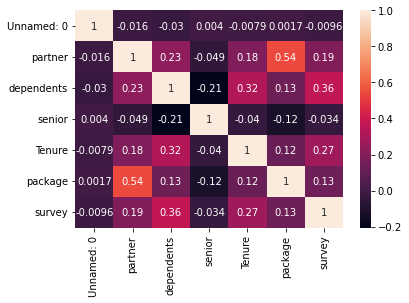

In [110]:
# Correlation heatmap for all numeric values
sns.heatmap(eda_df.corr(), annot=True)

Partner column showing good correlation with package. 

In [111]:
eda_df.groupby(['partner', 'package']).count()['gender']

partner  package
0        1          1713
         2          1175
         3           221
         4           216
1        1           483
         2           935
         3           899
         4          1708
Name: gender, dtype: int64

If there is no partner then customers are tend to buy the cheap package but there is a partner customers are inclined towards costliest package

---

Let's check the correlation with the output column but before that need map the values of output column to the integer one.

In [112]:
churn_df = eda_df.copy()
churn_df['churn'] = churn_df['churn'].apply(lambda val: 0 if val == 'No' else 1)
churn_df['churn'].value_counts()

TypeError: boolean value of NA is ambiguous

In [ ]:
# Let's check the heatmap now for this new df
sns.heatmap(churn_df.corr(), annot=True)

From the figure we can see that, 'dependents', 'Tenure', 'Survey' columns has high correlation with the Output column

In [ ]:
churn_df.groupby(['dependents', 'churn']).count()['gender']

In [ ]:
sns.countplot(data=churn_df, x='dependents', hue='churn')

If there dependents to the customer then they are less likely to churn than that of non-dependents.

In [ ]:
churn_df.groupby(['survey', 'churn']).count()['gender']

In [ ]:
sns.countplot(data=churn_df, x='survey', hue='churn')

In [ ]:
sns.pairplot(data=churn_df)

In [ ]:
sns.countplot(data=churn_df, x='partner', hue='package')

##Hypothesis Based on EDA
1.Is Low rating by user survey are responsible for increase in churn rate ?

2.Did Customer who subscribe for lower package churns on high rate?

3.If customer dont have any dependents will that increase the rate of churning?

4.If Customer is senior will he increase teh churn rate?

5.Do we observe any relationship between gender and churn rate of customers?

6.will partner or tenure contribute on churning of customers?

7.In Which  specific region company need to concentrate to reduce churning rate ?




1.Is Low rating by user survey are responsible for increase in churn rate


In [ ]:
#effect of survey on churn rate
sns.countplot(data=churn_df, x='survey', hue='churn')

As You can see Survey impact o churn rate is very high if Survey rating from customer is very high then customer churning possibility will reduce.

hence low rating from user is very likely responsible for increasing churn rate

2. Did Customer who subscribe for lower package churns on high rate?

In [ ]:
#effect of package on churn rate
sns.countplot(data=churn_df, x='package', hue='churn')

As you can see in above graph higher the package less the churn rate

hence we can say that if customer subscribe for higher package then they are very less likely churn but on other hand customer who subscribed lower package are responsible for increasing churn rate

3. Do Dependent affect on churn rate?

In [ ]:
#affect of dependent on churn rate
sns.countplot(data=churn_df, x='dependents', hue='churn')

As  you can see in graph if any custome have dependent then that customer can very less likely churn 



4. If Customer is senior will he increase the churn rate?

In [ ]:
#affect of senior on churn rate
sns.countplot(data=churn_df, x='senior', hue='churn')

from the graph you can clearly see customer who are senior are very less likely to churn

5. Do we observe any relationship between gender and churn rate of customers?


In [ ]:
#affect of gender on churn rate
sns.countplot(data=churn_df, x='gender', hue='churn')

As you can see gender dont have any high noticeable impact on churn

6. will partner or tenure contribute on churning of customers?


In [ ]:
#affect of partner on churn rate
sns.countplot(data=churn_df, x='partner', hue='churn')

In [ ]:
#affect of tenure  on churn rate
sns.countplot(data=churn_df, x='Tenure', hue='churn')

From Above Two graph we can see more the tenure less likely customer will churn and if customer have partner then it very liekly that customer will churn

7. In Which  specific location company need to concentrate to reduce churning rate ?

In [ ]:
#affect of tenure  on churn rate
churn_df[['location','churn']].groupby(['location']).agg(['mean','count'])

As You can see churn rate is very high in greater london so company can look into that location and can provide offers in that area

Data Collection

1.Data is collected by reading data.csv file provided by Lu's Communication using pandas 

In [ ]:
#reading dataset
#preprocessing data libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




file_name="/content/drive/MyDrive/Data Analytics Assignment - Jul 2022/customer_data.xlsx"
df=pd.read_excel(file_name,index_col=0)
df.head(20)

In [ ]:
#list of attributes/columns  avaialble in dataset and its data type
df.dtypes

In [ ]:
#generating data decription 
df.describe()

Here we can see min tenure is -5.1196152 which is not possible in real scenario hence we have date issue over column teure it cannot be negative and float 

In [ ]:
#return the number of row in dataset having tenure negative i.e <0 
df.query("Tenure < 0").shape[0]

From Above observation we have 126 such records in dataset which have tenure<0 hence we need to think about removing or modifying such records based on any such external information

In [ ]:
#Finding more information about columns and non-null vales with memory usage
df.info()


Here we can see monthly column have very less non null values as compared to others lets count the cases 

In [ ]:
#count the NULL values for column monthly_cost
df['monthly_cost'].isna().sum()

Theire are total 7271 null values

In [ ]:
df['survey'].value_counts()

In [ ]:
#handling survey values considering "no-reply as Null"
df['survey'].unique()
df=df.replace('No reply',np.nan)

In [ ]:
df['survey'].unique()

In [ ]:
#handling Class 
df['Class'].unique()
df['Class']=df['Class'].str[6:]
df=df.replace('$','Yes')

In [ ]:
df['Class'].value_counts()


EDA

In [ ]:
eda_df = pd.read_csv("/content/drive/MyDrive/Data Analytics Assignment - Jul 2022/DataFrame/EDA_ready_data.csv", index_col=0)
eda_df.drop('customer_id', axis=1, inplace=True)
eda_df.head(10)

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(eda_df.corr(), annot=True)
plt.show()

In [ ]:
# # Installing the pandas profilling for the profile reports
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
from pandas_profiling import ProfileReport

# # Generating reports for the dataset
# profile = ProfileReport(customer_df, title= 'Customer Churn Dataset Report', html={'style':{'full_width':True}})
# profile.to_notebook_iframe()

# # Saving the output in HTML format to view it
# # profile.to_file(output_file = 'Customer_Df.html')

In [ ]:
#too many null values in monthly_cost
eda_df.isna().sum()

In [ ]:
#some rows dont have churn values this values are important while creating EDA currently deleting such records 
eda_df.churn.replace(('Yes','No'),(1,0),inplace=True)
eda_df=eda_df.dropna(subset=['churn'])
eda_df.isna().sum()

Lets Check the dependency of each and combined attributes/column on churn italicized text

In [ ]:
#checking how gender effect over churn rate

eda_df[['gender','churn']].groupby(['gender']).agg(['mean','count'])

Females are most likely to churn since their churn rate is high
:: 

In [ ]:
eda_df[['gender','location','churn']].groupby(['location','gender']).agg(['mean','count'])

In [ ]:
eda_df.head(10)

In [ ]:
#effect of survey on churn rate
eda_df[['survey','churn']].groupby(['survey']).agg(['mean','count'])

From Above observation Survey effect on churn rate on large scale more the rating in survey less the chnaces of churn 

In [ ]:
eda_df[['package','churn']].groupby(['package']).agg(['mean','count'])

The above realation clearly show that less the package more the churn rate i.e 

In [ ]:
eda_df[['partner','package','churn']].groupby(['partner','package']).agg(['mean','count'])

From above observation we can see cutomer who dont have partner and subscribed for lower package are most likely to churn but on opposite side if customer have partner and subscribed to highest service then they are less likely to chunk


In [ ]:
eda_df[['partner','senior','package','churn']].groupby(['partner','senior','package']).agg(['mean','count'])

From Above observation if customer have partner and not a senior citizen are less likely to churn 

In [ ]:
eda_df[['partner','senior', 'dependents','package','churn']].groupby(['partner','senior','dependents','package']).agg(['mean','count'])

#Data Preprocessing

In [ ]:
eda_df = pd.read_csv("/content/drive/MyDrive/Data Analytics Assignment - Jul 2022/DataFrame/EDA_ready_data.csv", index_col=0)
eda_df.head(10)

In [ ]:
#check Null values 
eda_df.isna().sum()

In [ ]:
eda_df.count()

##handling  columns

1.Creating copy of eda_df i.e eda data frame into new data frame for data processing

2.Here Customer_id is not necessary to process data it dont have any relation with churn or any other column hence we can drop it

3.Similarly monthly_cost have only 79 records availaible out of 7350 hence by this column we cannot train or process our data hence we can drop this column



In [ ]:
processed_df=eda_df.copy()
processed_df.drop('customer_id', axis=1, inplace=True)
processed_df.drop('monthly_cost', axis=1, inplace=True)
processed_df.isna().sum()

##handling rows


1.churn is our target column in string format such as "Yes","No" we will convert it to numeric indication "Yes" = 1 and "No"= 0

2.gender also have gender column in format such as "male" and "female" we will convert that to numeric indicating "male"=1  "female"= 0

3.churn have 59 null records we will drop this records since churn is our target column and and if we dont know churn for given data then it will not help in creating model which predict th churn 


In [ ]:
processed_df.gender

In [ ]:
processed_df.churn.replace(('Yes','No'),(1,0),inplace=True)
processed_df.gender.replace(('Male','Female'),(1,0),inplace=True)
processed_df=processed_df.dropna(subset=['churn'])
# processed_df=processed_df.dropna(subset=['survey'])
processed_df.head(10)

In EDA we found only Tenure column have outliers which are in very less number as compared to whole dataset and it contains negative value and tenure canot be negative so here we are taking abs values for tenure where it is negative


In [ ]:
processed_df['Tenure'] = processed_df['Tenure'].apply(lambda val: abs(val) if val < 0.0 else val)
processed_df['Tenure'].unique()

In [ ]:
processed_df.isna().sum()

In [ ]:
processed_df.head(10)

Now we can see we have 2191 null records in dependent column we can not ignore them since they are correlated to churn hence we are going to fill them by using 
KNN Imputation

The idea in kNN methods is to identify 'k' samples in the dataset that are similar or close in the space. Then we use these 'k' samples to estimate the value of the missing data points. Each sample's missing values are imputed using the mean value of the 'k'-neighbors found in the datase

##KNN for missing values

Finding missing values for dependent column to run KNN we dont need loactaion column so dropping it from knn dataframe 

In [ ]:
knn_df=processed_df.copy()
knn_df.drop('location',axis=1,inplace=True)
knn_df.head(10)



In [ ]:
knn_df.isna().sum()

In [ ]:
#finding optimum n_neighbours  for KNN
df=knn_df.dropna(subset=['dependents'])
df=knn_df.dropna(subset=['survey'])
X = df.drop(['churn'], axis = 1)
y = df['churn']

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
op = []

for i in range(1,40):
    neighbour = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    ypredicted = neighbour.predict(X_test)
    op.append(metrics.accuracy_score(y_test, ypredicted))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),op,color = 'green',linestyle='dashed', 
         marker='o',markerfacecolor='orange', markersize=10)

k=op.index(max(op))
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(op),"at K =",k)
n_neighbours=op.index(max(op))

We got maximum accuracy at k=4 will consider K as 4

---



In [ ]:
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd 
scaler = StandardScaler()
#normalizing data
# ct = ColumnTransformer([
#         ('somename', StandardScaler(), ['Tenure'])
#     ], remainder='passthrough')
knn_df["Tenure"] = scaler.fit_transform(knn_df['Tenure'].values.reshape(-1,1))
knn_df

In [ ]:
knn_df['Tenure'].plot(kind='kde')

In [ ]:
knn_df.isna().sum()

In [ ]:
knn_df.count()

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=4)
knn_df = pd.DataFrame(imputer.fit_transform(knn_df),columns = knn_df.columns)

In [ ]:
knn_df

In [ ]:
print(knn_df.shape)
knn_df.isna().sum()

In [ ]:
print(processed_df.shape)
processed_df.isna().sum()

In [ ]:
final_df = processed_df.copy()
final_df['dependents'] = knn_df['dependents'].values
final_df['Tenure'] = knn_df['Tenure'].values
final_df['survey'] = knn_df['survey'].values
final_df.isna().sum()

In [ ]:
#final_df.to_csv("/content/drive/MyDrive/Data Analytics Assignment - Jul 2022/DataFrame/preprocessed_df.csv")

In [ ]:
final_df

As there are many categories inside the location column there is not a best way to encode it.
We will use two approaches - 1. One Hot 2. Weight of evidence encoding 

1. One Hot Encoding

In [ ]:
onehot_df = final_df.copy()

In [ ]:
one_hot_result = pd.get_dummies(onehot_df['location'], drop_first = True, prefix='loc')
onehot_df[one_hot_result.columns] = one_hot_result
onehot_df.drop('location', axis=1, inplace=True)

In [ ]:
onehot_df.head()

2. Weight of evidence transformation

In [ ]:
wef_df = final_df.copy()
new_df = pd.DataFrame(wef_df.groupby('location')['churn'].mean())

In [ ]:
new_df['WoE'] = np.log((1 - new_df.churn)/new_df.churn)
new_df

In [ ]:
wef_df['WeF_location'] = wef_df['location'].map(new_df['WoE'])
wef_df.head(10)

In [ ]:
wef_df.drop('location', axis=1, inplace=True)
wef_df.head(10)

# Feature Selection

Although our dataset is relatively small, let's use PCA for feature selection and see if it improves our accuracy.

In [ ]:
# Before applying feature selection let's just save the Dependent column
y = wef_df['churn']
x = wef_df.drop('churn', axis = 1)

In [ ]:
from sklearn.decomposition import PCA 

In [ ]:
pca = PCA()

# Get the principle components for WeF dataframe
principle_components_wef = pca.fit_transform(x)

In [ ]:
pd.DataFrame(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance')
plt.title('explained_variance_ratio')
plt.show()

We can see that around 95% of variance is being explained by 5 components. So instead of giving all 8 columns as input in our algorithm let's use these principle components instead

In [ ]:
pca = PCA(n_components=5)
pca_wef_df = pca.fit_transform(x)

principal_wef = pd.DataFrame(pca_wef_df, columns=['PC-1','PC-2','PC-3','PC-4','PC-5'])
principal_wef

In [ ]:
# Before applying feature selection let's just save the Dependent column
y = onehot_df['churn']
x = onehot_df.drop('churn', axis = 1)

pca = PCA()

# Get the principle components for onehot dataframe
principle_components_onehot = pca.fit_transform(x)

In [ ]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Variance')
plt.title('explained_variance_ratio')
plt.show()

We can see that around 95% of variance is being explained by 10 components. So instead of giving all 20 columns as input in our algorithm let's use these principle components instead

In [ ]:
pca = PCA(n_components=10)
pca_onehot_df = pca.fit_transform(x)

principal_onehot_df = pd.DataFrame(pca_onehot_df,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8', 'PC-9','PC-10'])
principal_onehot_df

# Data Modelling



In [ ]:
import sklearn.metrics as sm
from sklearn.model_selection import KFold

# Function to evaluate model
def evaluate_model(model, x, y):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores =[]

    kf = KFold(n_splits=10, random_state=0, shuffle=True)
    for train_index, test_index in kf.split(x):
        #setting up the data
        x_train, x_test = x.values[train_index], x.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]

        #Training model
        model.fit(x_train,y_train)
        
        #Evaluating model 
        y_pred = model.predict(x_test)
        
        accuracy_scores.append(sm.accuracy_score(y_test,y_pred))
        precision_scores.append(sm.precision_score(y_test,y_pred))
        recall_scores.append(sm.recall_score(y_test,y_pred))
        f1_scores.append(sm.f1_score(y_test, y_pred))
    

    #displaying average results 
    print("########")
    print("Results")
    print("########\n")
    print("Average accuracy score: ", (sum(accuracy_scores)/len(accuracy_scores)))
    print("Average precision score: ", (sum(precision_scores)/len(precision_scores)))
    print("Average recall score: ", (sum(recall_scores)/len(recall_scores)))
    print("Average F1 score: ", (sum(f1_scores)/len(f1_scores)))
    results = [(sum(accuracy_scores)/len(accuracy_scores)),
               (sum(precision_scores)/len(precision_scores)),
               (sum(recall_scores)/len(recall_scores)),
               (sum(f1_scores)/len(f1_scores))]
    return results



## Decision Tree

In [ ]:
columns = ["Algorithm", "Encoding", "Accuracy", "Precision", "Recall", "F1-Score"]
data = []

In [ ]:
#decision

from sklearn.tree import DecisionTreeClassifier
y = wef_df['churn']
model = DecisionTreeClassifier()
result= ["Decision tree", "WoE"]
result.extend(evaluate_model(model, principal_wef, y))
data.append(result)

In [ ]:
y = onehot_df['churn']
model = DecisionTreeClassifier()
result= ["Decision tree", "OneHot"]

result.extend(evaluate_model(model, principal_onehot_df, y))
data.append(result)

## XG Boost

In [ ]:
from xgboost import XGBClassifier
result= ["XGBoost", "WoE"]
# on WoE data
model = XGBClassifier()
y = wef_df['churn']
result.extend(evaluate_model(model, principal_wef, y))
data.append(result)

In [ ]:
# on One hot Data
y = onehot_df['churn']
result= ["XGBoost", "OneHot"]
result.extend(evaluate_model(model, principal_onehot_df, y))
data.append(result)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# on WoE data
model = RandomForestClassifier()
y = wef_df['churn']
result= ["Random Forest", "WoE"]
result.extend(evaluate_model(model, principal_wef, y))
data.append(result)

In [ ]:
# on One hot Data
y = onehot_df['churn']
result= ["Random Forest", "OneHot"]
result.extend(evaluate_model(model, principal_onehot_df, y))
data.append(result)

## SVM

In [ ]:
from sklearn.svm import SVC
# on WoE data
model = SVC()
result= ["SVM", "WoE"]
y = wef_df['churn']
result.extend(evaluate_model(model, principal_wef, y))
data.append(result)

In [ ]:
# on One hot Data
y = onehot_df['churn']
result= ["SVM", "OneHot"]
result.extend(evaluate_model(model, principal_onehot_df, y))
data.append(result)
# evaluate_model(model, principal_onehot_df, y)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# on WoE data
model = LogisticRegression(random_state=0)
y = wef_df['churn']
result= ["Logistic Regression", "WoE"]
result.extend(evaluate_model(model, principal_wef, y))
data.append(result)

In [ ]:
# on One hot Data
y = onehot_df['churn']
result= ["Logistic Regression", "OneHot"]
result.extend(evaluate_model(model, principal_onehot_df, y))
data.append(result)

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# on WoE data
model = GradientBoostingClassifier(random_state=0)
y = wef_df['churn']
result= ["Gradient Boost", "WoE"]
result.extend(evaluate_model(model, principal_wef, y))
data.append(result)

In [ ]:
# on One hot Data
y = onehot_df['churn']
result= ["Gradient Boost", "OneHot"]
result.extend(evaluate_model(model, principal_onehot_df, y))
data.append(result)

## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# on WoE data
model = AdaBoostClassifier(random_state=0)
y = wef_df['churn']
result= ["Adaboost", "WoE"]
result.extend(evaluate_model(model, principal_wef, y))
data.append(result)

In [ ]:
# on One hot Data
y = onehot_df['churn']
result= ["Adaboost", "OneHot"]
result.extend(evaluate_model(model, principal_onehot_df, y))
data.append(result)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x = principal_wef
y = wef_df['churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

### For **WOE**

In [ ]:
error_rate = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))


In [ ]:
print("Minimum error rate on:", error_rate.index(min(error_rate)))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("k")
plt.ylabel("Error Rate")

In [ ]:
# on WoE data
model = KNeighborsClassifier(n_neighbors=7)
y = wef_df['churn']
result= ["KNN", "WoE"]
result.extend(evaluate_model(model, principal_wef, y))
data.append(result)

### For One hot encoding

In [ ]:
y = onehot_df['churn']
x = principal_onehot_df
error_rate = []
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

print("Minimum error rate on:", error_rate.index(min(error_rate)))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("k")
plt.ylabel("Error Rate")

In [ ]:
# on One hot Data
model = KNeighborsClassifier(n_neighbors=14)
y = onehot_df['churn']
result= ["KNN", "OneHot"]
result.extend(evaluate_model(model, principal_wef, y))
data.append(result)

### Summarizing Results

In [ ]:
results_df = pd.DataFrame(data,columns=columns)

In [ ]:
results_df

In [ ]:
sns.barplot(data=results_df, x='Accuracy', y='Algorithm', hue='Encoding')
plt.legend(loc='lower left')

In [ ]:
import plotly.express as px
fig = px.bar(results_df, x="Algorithm", y="Accuracy",
             color='Encoding', barmode='group',
             height=400)
fig.show()

In [ ]:
fig = px.bar(results_df, x="Algorithm", y="F1-Score",
             color='Encoding', barmode='group',
             height=400)
fig.show()

# Summary
We evaluated multiple models across favored performance metrics like Accuracy, Precision, Recall, and F1 Score. 
The plot above illustrates the performance of all the considered models.
For robust results, we performed a 10-fold cross-validation. 
From the findings, we can conclude that the Random Forest algorithm gave the best performance using One Hot encoding.